In [1]:
class City:
    def __init__(self, code, name, region, population, lat, long): # class initiation
        self.code = code
        self.name = name
        self.region = region
        self.population = population 
        self.lat = lat 
        self.long = long 
    
    def __str__(self): # string function
        return str(self.name) + ',' + str(self.population) + ',' + str(self.lat) +','+ str(self.long)
    
    def get_population(self): 
        return self.population
    
    def get_latitude(self):
        return self.lat
    
    def get_name(self):
        return self.name

In [2]:
fp = open('world_cities.txt')
city_obj_list = []

# parse file, convert it to City object and append each object to the city_obj_list 
for line in fp:

    linesplit = line.split(',')    
    city = City(str(linesplit[0]), str(linesplit[1]), str(linesplit[2]), int(linesplit[3]), float(linesplit[4]), float(linesplit[5]))
    city_obj_list.append(city)

In [3]:
# Performs the quicksort algorithm.

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.get_population() >= city2.get_population()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.get_name().lower() <= city2.get_name().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.get_latitude() <= city2.get_latitude()

In [4]:
# sort the city_obj_list based on their name 
sort(city_obj_list, compare_name)
fo = open('cities_alpha.txt', 'w')
for i in city_obj_list:
    fo.write(str(i) + '\n')
fo.close()

In [5]:
# sort the city_obj_list based on their population
sort(city_obj_list, compare_population)
fo = open('cities_population.txt', 'w')
for i in city_obj_list:
    fo.write(str(i) + '\n')
fo.close()

In [6]:
# sort the city_obj_list based on their latitude 
sort(city_obj_list, compare_latitude)
fo = open('cities_latitude.txt', 'w')
for i in city_obj_list:
    fo.write(str(i) + '\n')
fo.close()

In [7]:
import matplotlib.pyplot as plt
import time
import IPython.display as dis


WIDTH = 720 # image (world.png) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution

img = plt.imread("world.jpg")
plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [8]:
# Convert a latitude and longitude to pixel locations.
# WIDTH & HEIGHT should be defined to be the size of the image (in pixels)
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)

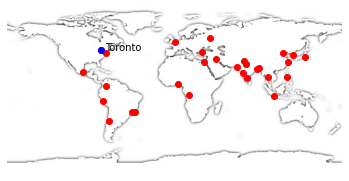

In [11]:
# grab the first 30 city object based on their population size 
with open("cities_population.txt") as myfile:
    first_set = [next(myfile) for x in range(30)]

city_list_plotted = [] # list of plotted city 
  
# parsing the file by line
for line in first_set:

    linesplit_pop = line.split(',')    
    lat = float(linesplit_pop[2]) # latitude of each city
    long = float(linesplit_pop[3]) # longitude of each city
    lat_p,long_p = longlat_to_pixel(lat, long) # convert to pixel space
    name = str(linesplit_pop[0]) # name of each city
    
    # append the potted city to the list 
    city_list_plotted.append([lat_p, long_p])
    
    # plot the image and city's name
    plt.imshow(img)
    plt.annotate(xy = [lat_p + 10, long_p], s = name)
    
    # loop through the already plotted city list and draw then as red dots
    for i in range(len(city_list_plotted)):
        x = city_list_plotted[i][0]
        y = city_list_plotted[i][1]
        plt.plot(x, y,'ro')
    
    # plot the current city with blue dot and update each frame 
    plt.plot(lat_p, long_p,'bo')
    plt.axis('off')
    plt.show()
    time.sleep(0.5)
    dis.clear_output(wait=True) 